spectral resolution: 9.765625Hz


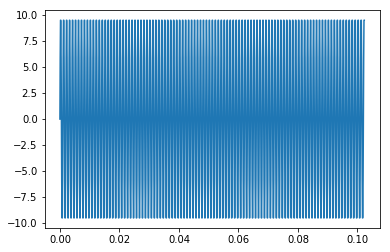

In [5]:
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftshift
from __future__ import division

#from IPython.html.widgets import *
from ipywidgets import *

N = 1024
Fs = 10000
Fc1 = 1000
Fc2 = 1050
t = np.arange(0, N/Fs, 1/Fs)
f = np.arange(-Fs/2, Fs/2, Fs/N)
A1 = 10
A2 = 4

x1 = A1*np.sin(2*np.pi*Fc1*t)
x2 = A2*np.sin(2*np.pi*Fc2*t)

id1 = int(Fc1/(Fs/N))
id2 = int(Fc2/(Fs/N))

plt.plot(t,x1)
print 'spectral resolution: '+str(Fs/N)+'Hz'

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


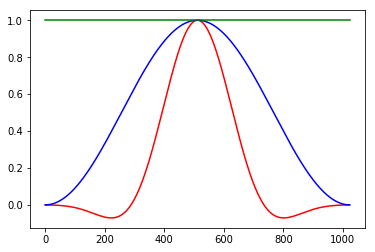

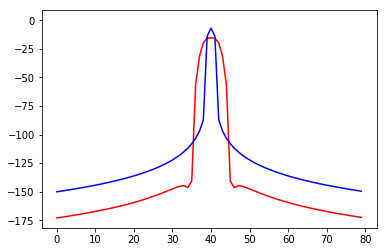

In [2]:
w1 = sig.flattop(N)
w2 = sig.windows.hann(N)
w3 = np.ones(N)
z = np.zeros(10)
#w3 = np.concatenate((z,w3,z),axis=0)
plt.plot(w1,'r')
plt.plot(w2,'b')
plt.plot(w3,'g')
plt.figure(2)
sw1 = 10*np.log(abs(fftshift(fft(w1)))/N)
sw2 = 10*np.log(abs(fftshift(fft(w2)))/N)
sw3 = 10*np.log(abs(fftshift(fft(w3)))/N)
plt.plot(sw1[int(N/2)-40:int(N/2)+40],'r')
plt.plot(sw2[int(N/2)-40:int(N/2)+40],'b')
plt.plot(sw3[int(N/2)-40:int(N/2)+40],'g')

('Flat Top max: ', 9.7888444250296907)
('Hanning max: ', 4.5014474743314308)
('Rec max range ', 7.5731752242111554)


<StemContainer object of 3 artists>

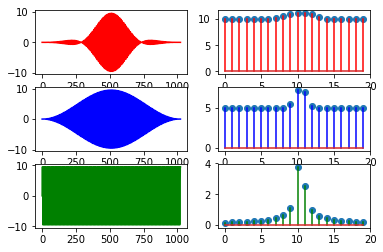

In [10]:
y = x1
yw1 = y*w1 #Flattop
yw2 = y*w2 #hanning
yw3 = y*w3 #rectangular
#plt.plot(yw1,'r')
#plt.plot(yw2,'b')
#plt.plot(yw3,'g')
#plt.figure(2)
ysw1 = (abs((fft(yw1)))/N)
ysw2 = (abs((fft(yw2)))/N)
ysw3 = (abs((fft(yw3)))/N)
#plt.stem(ysw1[id1-10:id1+10]+10,'r')
#plt.stem(ysw2[id1-10:id1+10]+5,'b')
#plt.stem(ysw3[id1-10:id1+10],'g')
print ("Flat Top max: ",np.amax(ysw1)*2/0.22);
print ("Hanning max: ",np.amax(ysw2)*2);
print ("Rec max range ",np.amax(ysw3)*2);


plt.subplot(321)
plt.plot(yw1,'r')
plt.subplot(322)
plt.stem(ysw1[id1-10:id1+10]+10,'r')
plt.subplot(323)
plt.plot(yw2,'b')
plt.subplot(324)
plt.stem(ysw2[id1-10:id1+10]+5,'b')
plt.subplot(325)
plt.plot(yw3,'g')
plt.subplot(326)
plt.stem(ysw3[id1-10:id1+10],'g')


<StemContainer object of 3 artists>

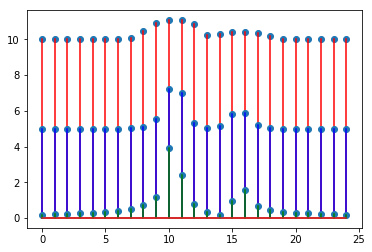

In [4]:
yy = x1+x2
yyw1 = yy*w1
yyw2 = yy*w2
yyw3 = yy*w3
yysw1 = (abs((fft(yyw1)))/N)
yysw2 = (abs((fft(yyw2)))/N)
yysw3 = (abs((fft(yyw3)))/N)
plt.stem(yysw1[id1-10:id2+10]+10,'r')
plt.stem(yysw2[id1-10:id2+10]+5,'b')
plt.stem(yysw3[id1-10:id2+10],'g')